In [1]:
%matplotlib inline
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
#from draw_court import DRAW_COURT
from nba_api.stats.static import players
from nba_api.stats.endpoints import commonplayerinfo, shotchartdetail

In [2]:
def SEARCH_PLAYERS(name):
    data = players.find_players_by_full_name(name)
    player_id = data[0]['id']
    return player_id

In [3]:
def SEARCH_PLAYER_TEAM(id):
    res = json.loads(commonplayerinfo.CommonPlayerInfo(player_id=id).get_json())
    headers = res['resultSets'][0]['headers']
    data = res['resultSets'][0]['rowSet']
    df = pd.DataFrame(data, columns=headers)
    team_id = df.at[0,'TEAM_ID']
    return team_id

In [4]:
def MAKE_SEASON(num):
    season_start = int(str(num) + '1001')
    season_end = int(str(num + 1) + '0930')
    return [season_start, season_end]

In [5]:
def GET_CHART(player_id, season):
    res = json.loads(shotchartdetail.ShotChartDetail(team_id=0, player_id=player_id).get_json())
    headers = res['resultSets'][0]['headers']
    data = res['resultSets'][0]['rowSet']
    df = pd.DataFrame(data, columns=headers)
    # str -> int
    df['GAME_DATE'] = df['GAME_DATE'].map(int)
    start = MAKE_SEASON(season)[0]
    end = MAKE_SEASON(season)[1]
    df = df[(df['GAME_DATE'] > start) & (df['GAME_DATE'] < end)]
    made = df[df.SHOT_MADE_FLAG == 1]
    #miss = df[df.SHOT_MADE_FLAG == 0]
    plt.figure(figsize=(12,11))
    plt.scatter(made.LOC_X, made.LOC_Y,c="blue")
    #plt.scatter(miss.LOC_X, miss.LOC_Y,c="red")
    #DRAW_COURT(outer_lines=True)
    plt.xlim(-250,250)
    plt.ylim(422.5, -47.5)
    plt.show()

In [11]:
name = 'stephen curry'
player_id = SEARCH_PLAYERS(name)
player_id

201939

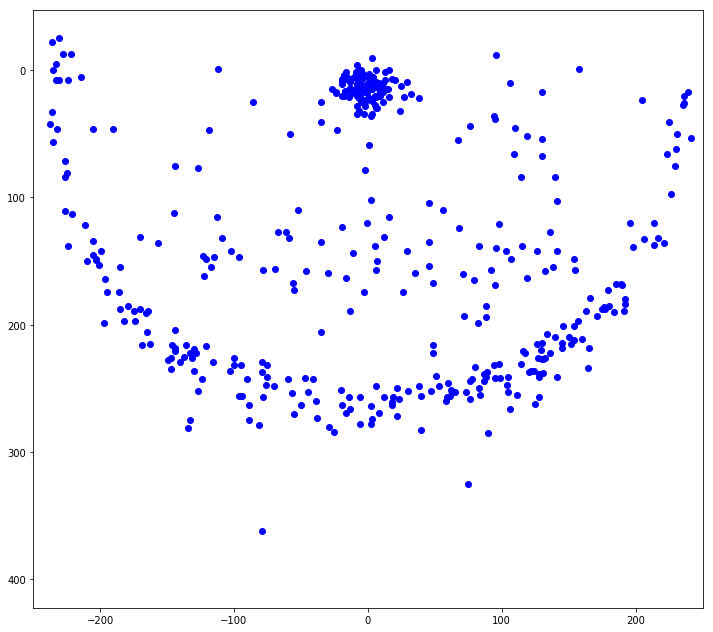

In [13]:
season = 2017
GET_CHART(player_id, season)